## Model Building: 
* We will build a Logistic Regression Model pipeline to classify whether the tweet contains hate speech or not. Here, our focus will be to build a fairly accurate classification model and to see how to deploy that model using Flask


In [1]:
import pandas as pd 
import numpy as np

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from nltk.stem import WordNetLemmatizer

import re


In [2]:
#read the data
data = pd.read_csv('twitter_sentiments.csv')
#peek into the data
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [3]:
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns')

The dataset has 31962 rows and 3 columns


In [4]:
data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

#### Label for normal tweet is 0 and it is 1 for racist tweet

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
# No missing data
# I need my label to be a category column

In [7]:
data['label'] = data['label'].astype('category')

#### Lets split the data into train and test, i'll use 25% and stratify on 'label' so as to have same distribution of target as in train and test

In [8]:
train, test = train_test_split(data, test_size = 0.25, stratify = data['label'], random_state=27)

In [9]:
train

,id,label,tweet
15507,15508,0,you're destiny! #smile #lifeisgood #live #life #lol #orlandoinmiami #originalâ¦
29287,29288,0,@user trust the process. trust yourself. trust your client. everything is exactly how it needs to be. #lifecoach #success
22992,22993,0,"just in time for #weekend #shopping lists, our #june newsletter ! get the news on everything #gut! #foodie"
15073,15074,0,@user i really need a quality poop. it has been way too long.
23000,23001,0,â #ukâs osborne warns of brexit budget cuts #blog #silver #gold #forex
26165,26166,0,always to share good things!
19634,19635,0,making sure i set up my life to live. #faith #trust @ potato chip rock
21321,21322,0,@user and we need better gun control too many people dying unnecessarily why do people need ar-15's to do what he did kill
16825,16826,1,@user #blacklivesmatters #lanasprayberry another in a position of authority has got to go #blacktwitter
25897,25898,0,when you know when you wake up your gonna be a loose cannon with a sho fuse because of the heat and your job #trouble #paddedroom


## Processing the tweets

In [11]:
# Remove the special characters and lemmatize
Lemma = WordNetLemmatizer()

In [13]:
train['text'] = [Lemma.lemmatize(''.join(Lemma.lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in tweet)) for tweet in train['tweet']]


In [18]:
test['text'] = [Lemma.lemmatize(''.join(Lemma.lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in tweet)) for tweet in test['tweet']]

In [14]:
train.head()

,id,label,tweet,text
15507,15508,0,you're destiny! #smile #lifeisgood #live #life #lol #orlandoinmiami #originalâ¦,you re destiny smile lifeisgood live life lol orlandoinmiami original
29287,29288,0,@user trust the process. trust yourself. trust your client. everything is exactly how it needs to be. #lifecoach #success,user trust the process trust yourself trust your client everything is exactly how it needs to be lifecoach success
22992,22993,0,"just in time for #weekend #shopping lists, our #june newsletter ! get the news on everything #gut! #foodie",just in time for weekend shopping lists our june newsletter get the news on everything gut foodie
15073,15074,0,@user i really need a quality poop. it has been way too long.,user i really need a quality poop it has been way too long
23000,23001,0,â #ukâs osborne warns of brexit budget cuts #blog #silver #gold #forex,uk s osborne warns of brexit budget cuts blog silver gold forex


In [19]:
test.head()

,id,label,tweet,text
2859,2860,0,i hate when people take shit that don't belong to them!!!! #frustrating #fedup #so ð¡ð¡ð¡ð ð ð,i hate when people take shit that don t belong to them frustrating fedup so
20048,20049,1,#trump ally wishes mad cow disease death for #obama - cnn #hatred #insults,trump ally wishes mad cow disease death for obama cnn hatred insults
25817,25818,0,#beachbody bull up: you will dominate your bull and you will direct it whatever you want it to do. when yo,beachbody bull up you will dominate your bull and you will direct it whatever you want it to do when yo
10255,10256,1,so this girl walks into #starbucks and refuses to let me serve her because i'm a white guy? whoa hey there and,so this girl walks into starbucks and refuses to let me serve her because i m a white guy whoa hey there and
2183,2184,0,#jacksonville rooster simulation: i want to climb the vast expanse of mountains. it reached the leakage co,jacksonville rooster simulation i want to climb the vast expanse of mountains it reached the leakage co


In [ ]:
WordNetLemmatizer()

### Vectorizer (1)

In [17]:
#creating a vectorizer object
TfidfVector = TfidfVectorizer(lowercase=True,stop_words=ENGLISH_STOP_WORDS, max_features=1000)

#fit the vectorizzer with the train tweets
TfidfVector.fit(train.text)

TfidfVectorizer(max_features=1000,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}))

In [20]:
#transform the train and test data

train_idf = TfidfVector.transform(train.text)
test_idf = TfidfVector.transform(test.text)

### Vectorizer(2)

In [37]:
new_tfidf = TfidfVectorizer(lowercase=True,stop_words=ENGLISH_STOP_WORDS, ngram_range=(1,3))

In [38]:
#fit the new vectorizer
new_tfidf.fit(train.text)

TfidfVectorizer(ngram_range=(1, 3),
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}))

In [40]:
new_train_idf = new_tfidf.transform(train.text)
new_test_idf = new_tfidf.transform(test.text)

### Model Building

In [22]:
#creating the object
LogReg = LogisticRegression()
Multi_Nb = MultinomialNB()

In [24]:
# fitting the data
LogReg.fit(train_idf,train.label)

# predicting on train
train_prediction = LogReg.predict(train_idf)

#predict on test
test_prediction = LogReg.predict(test_idf)

#Measuring accuracy on train
print(f'Score on train {f1_score(y_true=train.label, y_pred=train_prediction)}')

#Measuring accuracy on test 
print(f'Score on test {f1_score(y_true=test.label, y_pred=test_prediction)}')

Score on train 0.4738886491152352
Score on test 0.48984771573604063


In [25]:
# fitting the data
Multi_Nb.fit(train_idf,train.label)

# predicting on train
nb_train_prediction = Multi_Nb.predict(train_idf)

#predict on test
nb_test_prediction = Multi_Nb.predict(test_idf)

#Measuring accuracy on train
print(f'Score on train {f1_score(y_true=train.label, y_pred=nb_train_prediction)}')

#Measuring accuracy on test 
print(f'Score on test {f1_score(y_true=test.label, y_pred=nb_test_prediction)}')

Score on train 0.40712003651300777
Score on test 0.4366576819407008


In [28]:
Up_LogReg = LogisticRegression(C=100, max_iter=1000)

In [29]:
# fitting the data
Up_LogReg.fit(train_idf,train.label)

# predicting on train
up_train_prediction = Up_LogReg.predict(train_idf)

#predict on test
up_test_prediction = Up_LogReg.predict(test_idf)

#Measuring accuracy on train
print(f'Score on train {f1_score(y_true=train.label, y_pred=up_train_prediction)}')

#Measuring accuracy on test 
print(f'Score on test {f1_score(y_true=test.label, y_pred=up_test_prediction)}')

Score on train 0.583522297808012
Score on test 0.5590200445434298


In [30]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)}  
grid_search= GridSearchCV(Multi_Nb, parameters)
grid_search.fit(train_idf, train.label)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 1e-05)})

In [31]:
grid_search.best_params_

{'alpha': 0.1}

In [32]:
grid_search.best_score_

0.9453923243470397

In [33]:
tuned_Multi_Nb = MultinomialNB(alpha=0.1)

# fitting the data
tuned_Multi_Nb.fit(train_idf,train.label)

# predicting on train
tuned_nb_train_prediction =tuned_Multi_Nb.predict(train_idf)

#predict on test
tuned_nb_test_prediction = tuned_Multi_Nb.predict(test_idf)

#Measuring accuracy on train
print(f'Score on train {f1_score(y_true=train.label, y_pred=tuned_nb_train_prediction)}')

#Measuring accuracy on test 
print(f'Score on test {f1_score(y_true=test.label, y_pred=tuned_nb_test_prediction)}')

Score on train 0.4626609442060086
Score on test 0.4728682170542636


### Model Building with the new_tfidf


In [42]:
# fitting the data
Up_LogReg.fit(new_train_idf,train.label)

# predicting on train
new_train_prediction = Up_LogReg.predict(new_train_idf)

#predict on test
new_test_prediction = Up_LogReg.predict(new_test_idf)

#Measuring accuracy on train
print(f'Score on train {f1_score(y_true=train.label, y_pred=new_train_prediction)}')

#Measuring accuracy on test 
print(f'Score on test {f1_score(y_true=test.label, y_pred=new_test_prediction)}')

Score on train 0.998212157330155
Score on test 0.7457286432160806


####  Now that we have a fairly accurate model, let's have a pipeline

1. We have a tf-idf vectorizer with n-gram range of (1-3, lowercase set to true with no restriction on features
2. We have a Logistic Regression model with C=100 and max_iter= 1000

In [52]:
#Pipeline

pipeline = Pipeline(steps=[('tfidf', TfidfVectorizer(lowercase=True,
                                                    stop_words=ENGLISH_STOP_WORDS,
                                                    ngram_range=(1,3))),
                           ('model', LogisticRegression(C=100,max_iter=1000))])

#fit the pipeline with the training data
pipeline.fit(train.text, train.label)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(ngram_range=(1, 3),
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
          

In [53]:
text = ["Virat Kohli, AB de Villiers set to auction their 'Green Day' kits from 2016 IPL match to raise funds"]
pipeline.predict(text)

array([0])

In [73]:
text = ["Tell that black dude to return what he took"]
pipeline.predict(text)

array([1])

In [84]:
text = ["it is a world run by the Zionist Jewish Influence and Race Tainting Paedophiles that are only here to take our heritage and destroy the qualities that make us White People great…"]
pipeline.predict(text)

array([1])

In [85]:
text = ["Arabs have no knowledge of personal hygiene products such as deodorant or even soap"]# nothing has ever turned my stomach like the fetid stench of unwashed wogs!"]
pipeline.predict(text)

array([0])

In [99]:
text = ['Damning russian filt']
pipeline.predict(text)

array([0])

In [101]:
text = ["Non Muslim Arab Women end up looking like cheap drag queens, a parody of Woman"]
pipeline.predict(text)

array([1])

In [105]:
text = ["i'll only employ white people"]
pipeline.predict(text)

array([1])

In [79]:
pipeline_predict = pipeline.predict(test.text)
print(f'Score on test {f1_score(y_true=test.label, y_pred=pipeline_predict)}')

Score on test 0.7457286432160806


### Dump the model 

In [106]:
#import joblib
from joblib import dump

#dump the model 
dump(pipeline, filename="tweet_classification.joblib")

['tweet_classification.joblib']

In [58]:
from wordcloud import WordCloud

In [66]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', min_font_size = 20)

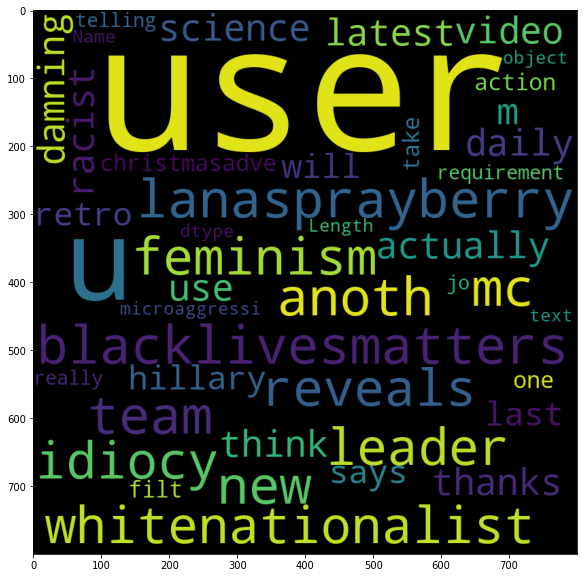

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(wordcloud.generate(str(racist_comments['text'])))

In [104]:
racist_comments.tail(10)

,id,label,tweet,text
11604,11605,1,"#sikh #temple vandalised in in #calgary, #wso condemns act",sikh temple vandalised in in calgary wso condemns act
6167,6168,1,sea shepherd suppoers are racist! #seashepherd #antiracism,sea shepherd suppoers are racist seashepherd antiracism
21185,21186,1,"@user there is no way, that this, this... man should be allowed to become attorney general. #liar #asshat",user there is no way that this this man should be allowed to become attorney general liar asshat
15924,15925,1,nothing would be more dangerous than to give #putinschoice the impression we accept #stopracism #boycott?â¦,nothing would be more dangerous than to give putinschoice the impression we accept stopracism boycott
19115,19116,1,are you #hispanic &amp; feel like the are â¦ on you? listen #retweet #boricua #miamiâ¦,are you hispanic amp feel like the are on you listen retweet boricua miami
27333,27334,1,damning video: racist hillary says ' i will only talk to white people' #hillary,damning video racist hillary says i will only talk to white people hillary
27026,27027,1,"@user last retro #christmasadve for you this year, and whilst i do love a good bit of #tupperwear i do not wantâ¦",user last retro christmasadve for you this year and whilst i do love a good bit of tupperwear i do not want
13615,13616,1,@user you should take action against your filthy plantation location manager. what a disgraceful pos! #boycott,user you should take action against your filthy plantation location manager what a disgraceful pos boycott
30831,30832,1,@user there is only one requirement for the job of the us president: being male #stillwithher #hillaryclinton #neverumpâ¦,user there is only one requirement for the job of the us president being male stillwithher hillaryclinton neverump
9079,9080,1,@user this is really telling. #microaggressions #race #whiteprivilege #antiblackness,user this is really telling microaggressions race whiteprivilege antiblackness
